In [1]:
import gzip
import csv

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
dataSet = pd.read_csv('RAW_interactions.csv')

In [3]:
dataSet.head()

,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin..."


In [4]:
len(dataSet)

1132367

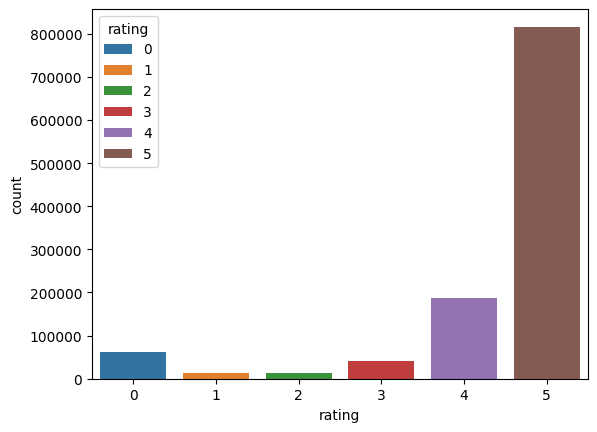

In [5]:
ratingBar = sns.countplot(x='rating', hue='rating', data=dataSet, dodge=False)

In [6]:
from collections import defaultdict
import string
from wordcloud import WordCloud

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/xiangyilin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
def read_CSV(path):
    with open(path, 'r',encoding="utf-8") as f:
        for line in csv.DictReader(f):
            yield line

In [8]:
data = list(read_CSV("RAW_interactions.csv"))

In [22]:
def showWordCloud(feature):
  wordCount = defaultdict(int)
  punctuation = set(string.punctuation)
  for d in data:
    r = ''.join([c for c in d[feature].lower() if not c in punctuation])
    for w in r.split():
      if w in stop: continue
      wordCount[w] += 1

  Could = WordCloud(max_font_size=50, max_words=100, background_color="white").generate_from_frequencies(wordCount)
  plt.figure()
  plt.title(feature)
  plt.imshow(Could, interpolation="bilinear")
  plt.axis("off")
  plt.show()

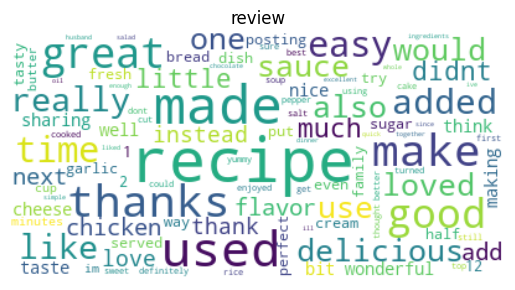

In [23]:
showWordCloud('review')

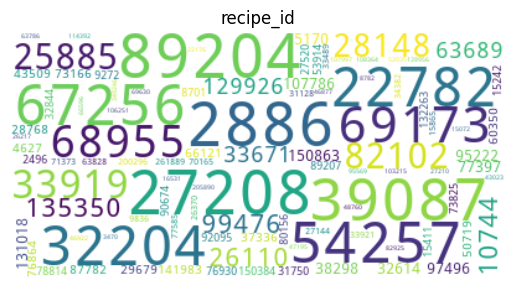

In [24]:
showWordCloud('recipe_id')

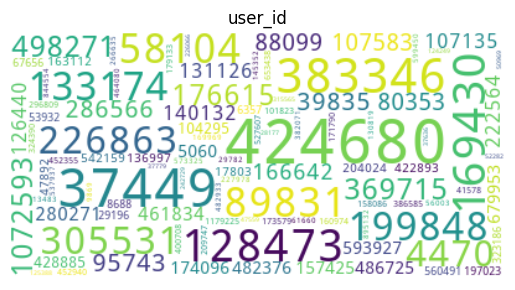

In [25]:
showWordCloud('user_id')

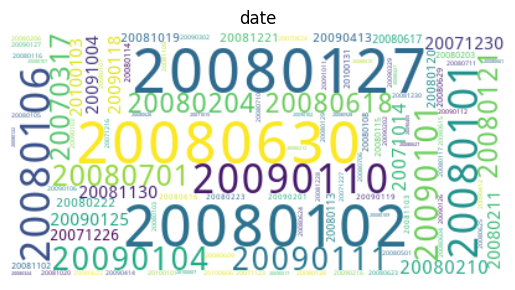

In [26]:
showWordCloud('date')

In [48]:
ratingsPerUser = defaultdict(list)
ratingsPerItem = defaultdict(list)
countUserRating = defaultdict(int)
countRecipeRating = defaultdict(int)
for d in data:
    ratingsPerUser[d['user_id']].append(d)
    ratingsPerItem[d['recipe_id']].append(d)
    countUserRating[d['user_id']] += 1
    countRecipeRating[d['recipe_id']] += 1

In [49]:
len(ratingsPerUser)

226570

In [50]:
len(ratingsPerItem)

231637

In [52]:
UserRating = [(countUserRating[c], c) for c in countUserRating]
UserRating.sort()
UserRating.reverse()
UserRating[:5]

[(7671, '424680'),
 (5603, '37449'),
 (4628, '383346'),
 (4076, '169430'),
 (3917, '128473')]

In [53]:
UserRating[-5:]

[(1, '1000194'),
 (1, '1000162'),
 (1, '1000027'),
 (1, '1000016'),
 (1, '1000014')]

([<matplotlib.axis.XTick at 0x29c45c400>,
 [Text(0, 0, '424680'),
  Text(1, 0, '37449'),
  Text(2, 0, '383346'),
  Text(3, 0, '169430'),
  Text(4, 0, '128473'),
  Text(5, 0, '89831'),
  Text(6, 0, '58104'),
  Text(7, 0, '133174'),
  Text(8, 0, '199848'),
  Text(9, 0, '305531')])

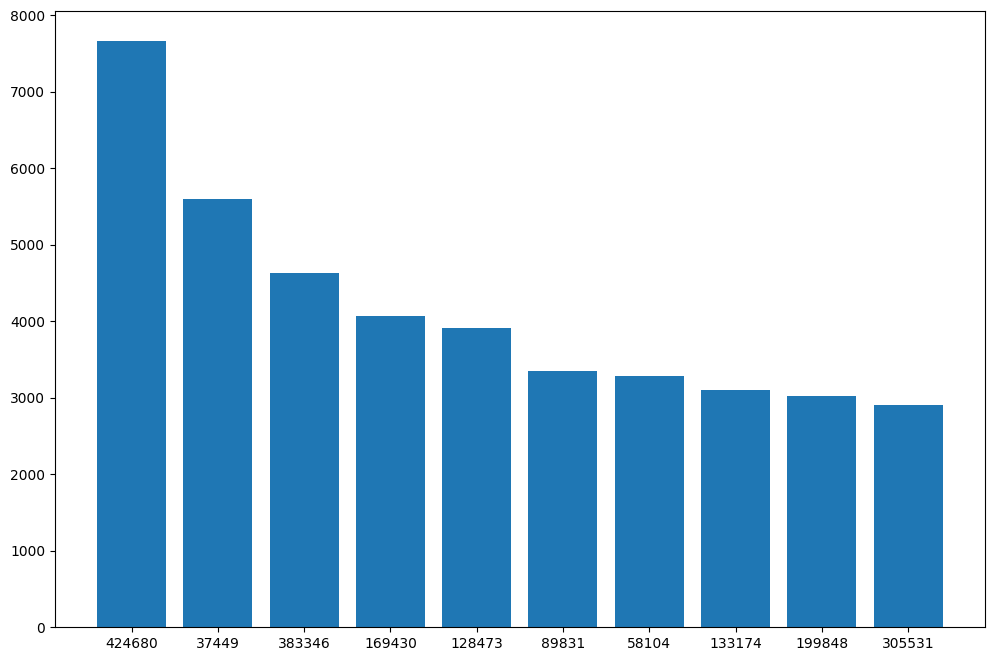

In [57]:
plt.figure(figsize=(12,8))
values, labels = zip(*UserRating[:10])
plt.bar(np.arange(len(labels)), values, align='center')
plt.xticks(np.arange(len(labels)), labels)

In [58]:
max(dataSet['date'])

'2018-12-20'

In [59]:
min(dataSet['date'])

'2000-01-25'

In [60]:
RecipeRating = [(countRecipeRating[c], c) for c in countRecipeRating]
RecipeRating.sort()
RecipeRating.reverse()
RecipeRating[:5]

[(1613, '2886'),
 (1601, '27208'),
 (1579, '89204'),
 (1448, '39087'),
 (1322, '67256')]

In [61]:
RecipeRating[-5:]

[(1, '100018'), (1, '100017'), (1, '100010'), (1, '100007'), (1, '100002')]

([<matplotlib.axis.XTick at 0x2e0cd12a0>,
 [Text(0, 0, '2886'),
  Text(1, 0, '27208'),
  Text(2, 0, '89204'),
  Text(3, 0, '39087'),
  Text(4, 0, '67256'),
  Text(5, 0, '54257'),
  Text(6, 0, '22782'),
  Text(7, 0, '32204'),
  Text(8, 0, '69173'),
  Text(9, 0, '68955')])

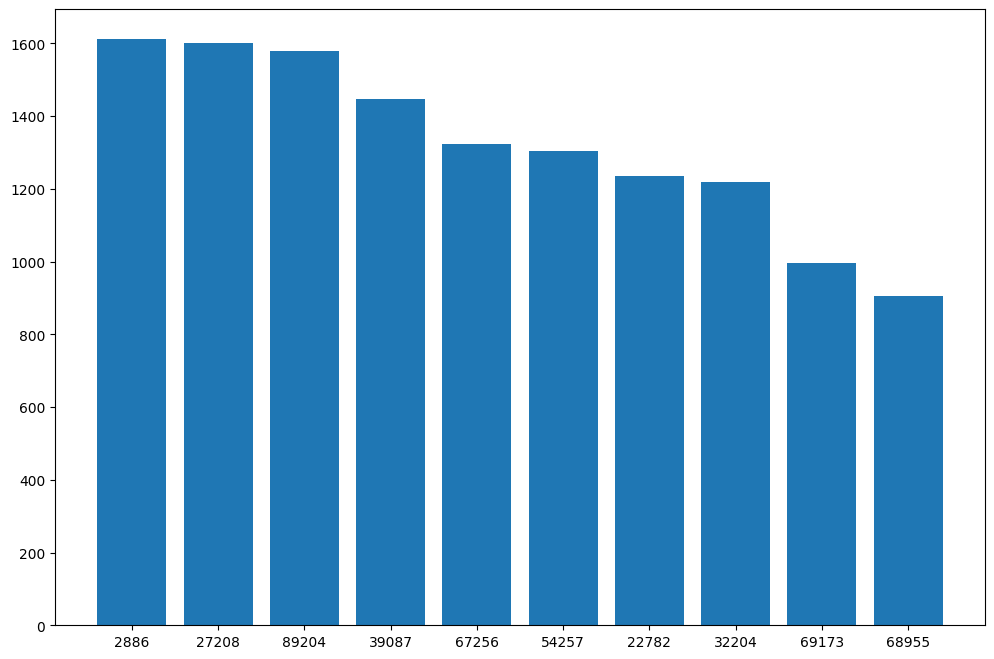

In [62]:
plt.figure(figsize=(12,8))
values, labels = zip(*RecipeRating[:10])
plt.bar(np.arange(len(labels)), values, align='center')
plt.xticks(np.arange(len(labels)), labels)